# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/hmchilders/eds220-hw-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

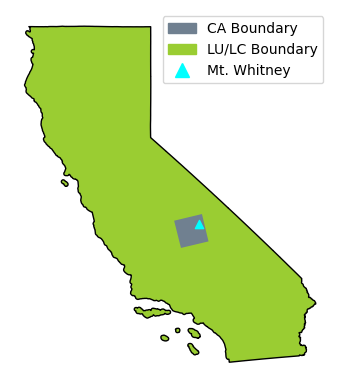

In [1]:
### ===== FINAL CODE =====

# import libraries and functions here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from shapely import Point
from shapely.geometry import box
import matplotlib.lines as mlines

#---IMPORT THE DATA---
# Import the LU/LC data
lulc = rioxr.open_rasterio(os.path.join(os.getcwd(),'data','land_cover.tif'))
# Import the California Shape file and store it as a variable
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

##---CREATE THE BOUNDING BOX---
#Create a bounding box using the bounds of the LU/LC Data
lulc_bbox = gpd.GeoDataFrame(geometry = [box(*lulc.rio.bounds())], 
                           crs = lulc.rio.crs)
##---CREATE MT.WHITNEY----
#Use Shapely.Point to to turn the coordinates into a point
coords = Point(-118.29199495, 36.578580925)
#Create the mt_whitney point and save it as a geodataframe
mt_whitney = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[coords])

#---UPDATE THE DATA---
# Use the squeeze method to remove dimensions with length 1
lulc = lulc.squeeze()
#Remove coordinates associated with that dimension
lulc = lulc.drop('band')
#Reproject the LU/LC Data to the ca CRS
lulc_bbox = lulc_bbox.to_crs(ca.crs)
#Reproject the point to the same CRS as the LU/LC Data
mt_whitney = mt_whitney.to_crs(ca.crs)

#---PLOT THE FIGURE---
#Set the figfure and axis
fig , ax = plt.subplots()
#Turn the axis labels off
plt.axis('off')

#Use Patches
#Plot the three Data Sets
ca.plot(ax=ax, 
        color='yellowgreen', 
        edgecolor='black')
lulc_bbox.plot(ax=ax, 
               color='slategrey')
mt_whitney.plot(ax=ax, 
                color='aqua', 
                marker="^", 
                markersize = 35)

#Add a legend
ca_patch = mpatches.Patch(color='slategrey', 
                          label='CA Boundary')
lulc_patch = mpatches.Patch(color='yellowgreen', 
                            label='LU/LC Boundary')
mt_patch = mlines.Line2D([],[],
                         linestyle = 'None', 
                         color='aqua', 
                         marker='^',
                          markersize=10, 
                         label='Mt. Whitney')

ax.legend(handles=[ca_patch, 
                   lulc_patch, 
                   mt_patch])
plt.show()

## Import libraries and functions

In [2]:
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from shapely import Point
from shapely.geometry import box
import matplotlib.lines as mlines

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [3]:
# Import the LU/LC data
lulc = rioxr.open_rasterio(os.path.join(os.getcwd(),'data','land_cover.tif'))
# Use the squeeze method to remove dimensions with length 1
lulc = lulc.squeeze()
#Remove coordinates associated with that dimension
lulc = lulc.drop('band')

In [4]:
# Import the California Shape file and store it as a variable
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

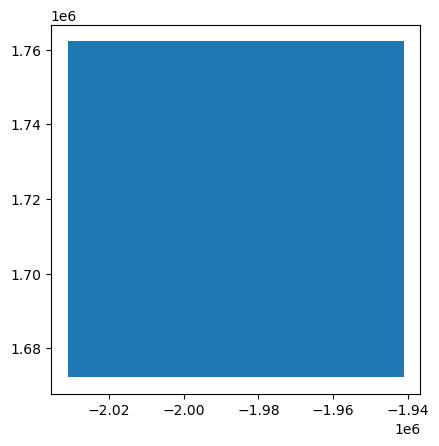

In [5]:
#Create a bounding box using the bounds of the LU/LC Data
lulc_bbox = gpd.GeoDataFrame(geometry = [box(*lulc.rio.bounds())], 
                           crs = lulc.rio.crs)
#Plot the bounding box to check the output
lulc_bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [6]:
#Use Shapely.Point to to turn the coordinates into a point
coords = Point(-118.29199495, 36.578580925)
#Create the mt_whitney point and save it as a geodataframe
mt_whitney = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[coords])

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [7]:
#Reproject the LU/LC Data to the ca CRS
lulc_bbox = lulc_bbox.to_crs(ca.crs)
#Reproject the point to the same CRS as the LU/LC Data
mt_whitney = mt_whitney.to_crs(ca.crs)

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

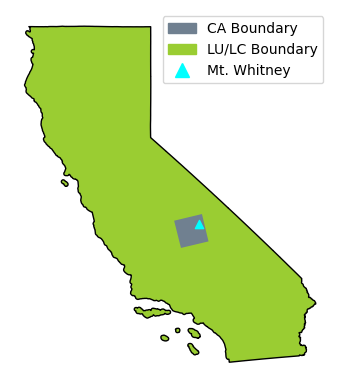

In [8]:
#Create the Figure
#Set the figfure and axis
fig , ax = plt.subplots()
#Turn the axis labels off
plt.axis('off')

#Use Patches
#Plot the three Data Sets
ca.plot(ax=ax, 
        color='yellowgreen', 
        edgecolor='black')
lulc_bbox.plot(ax=ax, 
               color='slategrey', 
               label='LULC Bbox')
mt_whitney.plot(ax=ax, 
                color='aqua', 
                marker="^", 
                markersize = 35,
                label='Mt. Whitney')

#Add a legend
ca_patch = mpatches.Patch(color='slategrey', label='CA Boundary')
lulc_patch = mpatches.Patch(color='yellowgreen', label='LU/LC Boundary')
mt_patch = mlines.Line2D([], [],linestyle = 'None', color='aqua', marker='^',
                          markersize=10, label='Mt. Whitney')

ax.legend(handles=[ca_patch, lulc_patch, mt_patch])
plt.show()


## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
